In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer
from scipy import stats

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [2]:
def in_rects(scores,n_y):
    rects = plt.bar(n_y, scores['test_roc_auc'].mean(), bar_width, alpha=opacity,color='g', label='roc_auc')
    rects = plt.bar(n_y+(1*bar_width), scores['test_accuracy'].mean(), bar_width, alpha=opacity,color='y', label='accuracy')
    rects = plt.bar(n_y+(2*bar_width), scores['test_precision'].mean(), bar_width, alpha=opacity,color='r', label='precision')
    rects = plt.bar(n_y+(3*bar_width), scores['test_recall'].mean(), bar_width, alpha=opacity,color='m', label='recall')
    rects = plt.bar(n_y+(4*bar_width), scores['test_f1'].mean(), bar_width, alpha=opacity,color='b', label='f1')
    return(rects)

In [3]:
def fig_3d(X,y):
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, c=y, marker='o', cmap='autumn', edgecolors='black', s = 50, linewidths=1.5)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


In [4]:
def offline_fig_3d(X,y):
    surface = Scatter3d(x=X[:,0],y=X[:,1],z=y,mode='markers',marker=Marker(color=y,size=5,opacity=0.8))
    data = Data([surface])
    layout = Layout(autosize=True, title='Parametric Plot', scene=Scene(
            xaxis=XAxis(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=YAxis(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=ZAxis(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = Figure(data=data, layout=layout)
    iplot(fig)

In [5]:
def conf_int(X, alfa=0.05):
    n=X.size-1
    t=stats.t(n)
    tcr=t.ppf(1-alfa/2)
    temp=tcr*np.std(X)/np.sqrt(n+1)

    return temp

In [6]:
dataset=np.loadtxt('transfusion.txt', delimiter=',', dtype=str, )
titles=np.loadtxt('transfusion_titles.txt', delimiter=',',dtype=str)
name_metods=['LR1','KNN','SVM','DTC']
dataset=[[float(n) for n in e] for e in dataset]
X=[]
y=[]
for row in dataset:
    X.append(row[:4])
    y.append(int(row[4]))
X=np.array(X)
y=np.array(y)

1 component: 99.98% of initial variance
-0.001 x Recency (months) + 0.004 x Frequency (times) + 1.000 x Monetary (c.c. blood) + 0.011 x Time (months)
2 component: 0.02% of initial variance
0.178 x Recency (months) + -0.000 x Frequency (times) + -0.010 x Monetary (c.c. blood) + 0.984 x Time (months)


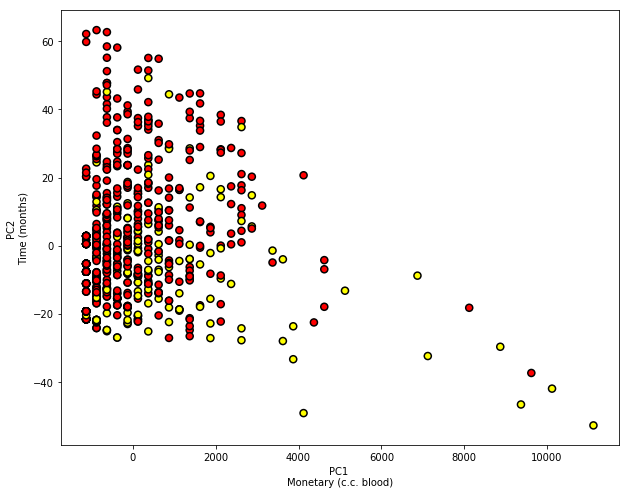

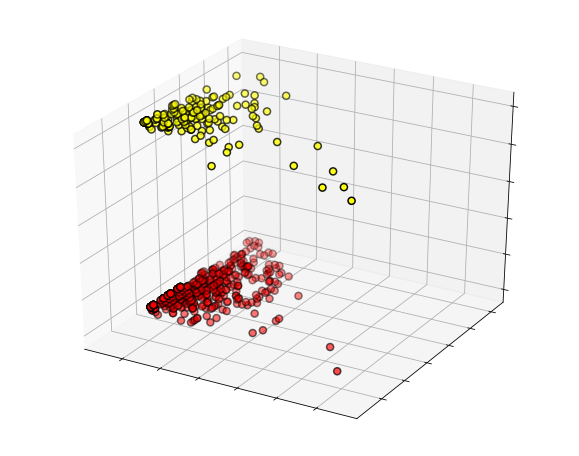

In [7]:
pca=decomposition.PCA(n_components=2)
X_centred = X
# -X.mean(axis=0)
pca.fit(X_centred)
X_pca=pca.transform(X_centred)
# plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'ro', label='NO')
# plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'yo', label='YES')
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            titles)))
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 50, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.xlabel('PC1 \n'+titles[2])
plt.ylabel('PC2 \n'+titles[3])
plt.legend(loc=0)
plt.show()
fig_3d(X_pca,y)
# offline_fig_3d(X_pca,y)

In [8]:
scoring = ['roc_auc','accuracy', 'precision','recall','f1']

In [9]:
clf_LR1 = LogisticRegression(penalty='l1', tol=0.001, C=1, solver='liblinear')
scores_LR1 = cross_validate(clf_LR1,X, y, scoring=scoring, cv=5, return_train_score=True)
confidence_interval_LR1=stats.t.interval(alpha=0.05, df=4, loc=scores_LR1['test_roc_auc'].mean(), 
                                         scale=scores_LR1['test_roc_auc'].std())

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



In [10]:
clf_SVM = SVC(kernel='rbf', gamma=0.001, C=10)
scores_SVM = cross_validate(clf_SVM, X, y, scoring=scoring, cv=5, return_train_score=True)
confidence_interval_SVM=stats.t.interval(alpha=0.05, df=4, loc=scores_SVM['test_roc_auc'].mean(), 
                                         scale=scores_SVM['test_roc_auc'].std())

In [11]:
clf_KNN=KNeighborsClassifier(n_neighbors=5, weights='uniform' )
scores_KNN = cross_validate(clf_KNN, X, y, scoring=scoring, cv=5, return_train_score=True)
confidence_interval_KNN=stats.t.interval(alpha=0.05, df=4, loc=scores_KNN['test_roc_auc'].mean(), 
                                         scale=scores_KNN['test_roc_auc'].std())

In [12]:
clf_DTC = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
scores_DTC = cross_validate(clf_DTC, X, y, scoring=scoring, cv=5, return_train_score=True)
confidence_interval_DTC=stats.t.interval(alpha=0.05, df=1, loc=scores_DTC['test_roc_auc'].mean(), 
                                         scale=scores_DTC['test_roc_auc'].std())

In [13]:
print(name_metods[0])
print(confidence_interval_LR1)

for i in range(len(scoring)):
    key = 'test_'+scoring[i]
    print(scoring[i]+": %0.02f (+/- %0.2f)"
          % (scores_LR1[key].mean(), scores_LR1[key].std()*2))
    
    
print("\n"+name_metods[1])
print(confidence_interval_KNN)
for i in range(len(scoring)):
    key = 'test_'+scoring[i]
    print(scoring[i]+": %0.02f (+/- %0.2f)"
          % (scores_KNN[key].mean(), scores_KNN[key].std()*2))
    
    
print("\n"+name_metods[2])
print(confidence_interval_SVM)
for i in range(len(scoring)):
    key = 'test_'+scoring[i]
    print(scoring[i]+": %0.02f (+/- %0.2f)"
          % (scores_SVM[key].mean(), scores_SVM[key].std()*2))
    
    
print("\n"+name_metods[3])
print(confidence_interval_DTC)
for i in range(len(scoring)):
    key = 'test_'+scoring[i]
    print(scoring[i]+": %0.02f (+/- %0.2f)"
          % (scores_DTC[key].mean(), scores_DTC[key].std()*2))

LR1
(0.87265828949391111, 0.88196298591683797)
roc_auc: 0.88 (+/- 0.14)
accuracy: 0.78 (+/- 0.06)
precision: 0.25 (+/- 0.62)
recall: 0.27 (+/- 0.71)
f1: 0.25 (+/- 0.61)

KNN
(0.52177607791354963, 0.53599613038497451)
roc_auc: 0.53 (+/- 0.21)
accuracy: 0.66 (+/- 0.27)
precision: 0.40 (+/- 0.29)
recall: 0.27 (+/- 0.43)
f1: 0.23 (+/- 0.24)

SVM
(0.58775767442229665, 0.60188727127528063)
roc_auc: 0.59 (+/- 0.21)
accuracy: 0.72 (+/- 0.20)
precision: 0.58 (+/- 0.50)
recall: 0.22 (+/- 0.30)
f1: 0.25 (+/- 0.25)

DTC
(0.6227496135151227, 0.63472462764332893)
roc_auc: 0.63 (+/- 0.15)
accuracy: 0.74 (+/- 0.19)
precision: 0.44 (+/- 0.52)
recall: 0.42 (+/- 0.59)
f1: 0.38 (+/- 0.42)


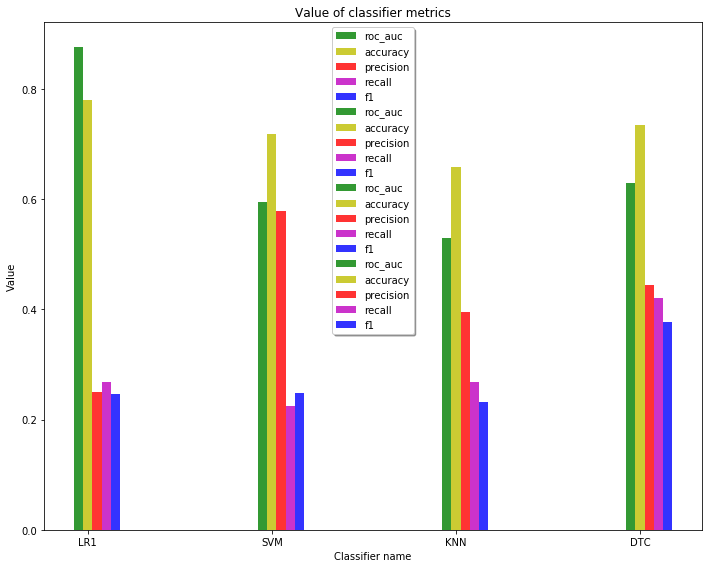

In [14]:
import matplotlib.pyplot as plt
plt.clf()
titles=('LR1', 'SVM', 'KNN', 'DTC')
y_pos = np.arange(len(titles))
ax =plt.subplot()
bar_width=0.05
opacity=0.8

rects1=in_rects(scores_LR1,y_pos[0])
rects1=in_rects(scores_SVM,y_pos[1])
rects1=in_rects(scores_KNN,y_pos[2])
rects1=in_rects(scores_DTC,y_pos[3])

plt.xlabel('Сlassifier name')
plt.ylabel('Value')
plt.title('Value of classifier metrics')
plt.xticks(y_pos+bar_width, titles)
plt.legend(loc='upper center',ncol=1, bbox_to_anchor=(0.5, 1.00), shadow=True)
plt.tight_layout()
plt.show()

In [15]:
def get_grid(data):
    x_min, x_max = data[:, 0].min()-1,data[:,0].max()+1
    y_min, y_max = data[:, 1].min()-1,data[:,1].max()+1
    return np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

In [16]:
from __future__ import division, print_function
import pandas as pd
import seaborn as sns

Accuracy_DTC: 0.75556
Precision_DTC: 0.48276
Roc_Auc_DTC: 0.58577


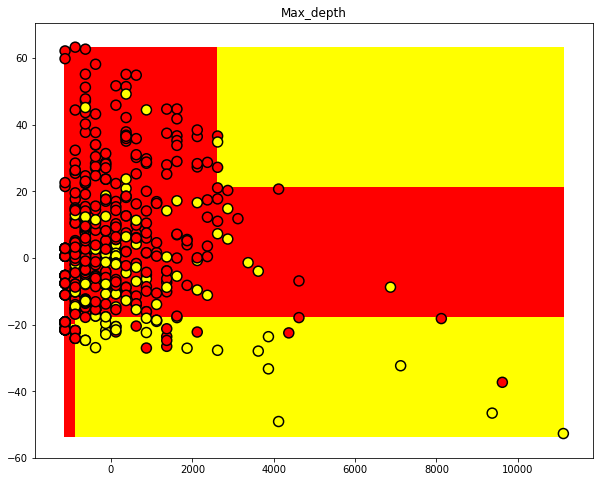

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,stratify=y,random_state=42)
clf_DTC_ = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_DTC_.fit(X_train, y_train)
xx, yy = get_grid(X_train)
predicted = clf_DTC_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,s=100,cmap='autumn', edgecolors='black', linewidths=1.5)
preds_DTC = clf_DTC_.predict_proba(X_test)
y_score_DTC=clf_DTC_.predict(X_test)
print('Accuracy_DTC: {:.5f}'.format(accuracy_score(y_test, preds_DTC.argmax(axis=1))))
print('Precision_DTC: {:.5f}'.format(precision_score(y_test, preds_DTC.argmax(axis=1))))
print('Roc_Auc_DTC: {:.5f}'.format(roc_auc_score(y_test, preds_DTC.argmax(axis=1))))
plt.title("Max_depth")
plt.show()